In [1]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

In [3]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = np.loadtxt("./dataset/class.csv", delimiter=",")
Data_set

array([[ 2., 81.],
       [ 4., 93.],
       [ 6., 91.],
       [ 8., 97.]])

In [5]:
X = [i[0] for i in Data_set]
Y = [i[1] for i in Data_set]
print(X)
print(Y)

[2.0, 4.0, 6.0, 8.0]
[81.0, 93.0, 91.0, 97.0]


In [6]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

In [ ]:
# 딥러닝을 실행합니다.
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])
early_stopping = EarlyStopping()
model.fit(X, Y, epochs=800, batch_size=1, shuffle=False, callbacks=[early_stopping])

Train on 4 samples
Epoch 1/800
4/4 [==============================] - 1s 135ms/sample - loss: 3810.1227 - mse: 3810.1226
Epoch 2/800
4/4 [==============================] - 0s 4ms/sample - loss: 1253.6365 - mse: 1253.6365
Epoch 3/800
4/4 [==============================] - 0s 5ms/sample - loss: 1269.7119 - mse: 1269.7120
Epoch 4/800
4/4 [==============================] - 0s 4ms/sample - loss: 1229.4535 - mse: 1229.4535
Epoch 5/800
4/4 [==============================] - 0s 5ms/sample - loss: 1193.1250 - mse: 1193.1250
Epoch 6/800
4/4 [==============================] - 0s 5ms/sample - loss: 1157.7624 - mse: 1157.7625
Epoch 7/800
4/4 [==============================] - 0s 6ms/sample - loss: 1123.4681 - mse: 1123.4681
Epoch 8/800
4/4 [==============================] - 0s 6ms/sample - loss: 1090.2039 - mse: 1090.2040
Epoch 9/800
4/4 [==============================] - 0s 6ms/sample - loss: 1057.9389 - mse: 1057.9388
Epoch 10/800
1/4 [======>.......................] - ETA: 0s - loss: 2422.4834 -

C:\Users\shha\anaconda3\envs\tf2\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mse
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


4/4 [==============================] - 0s 6ms/sample - loss: 1026.6430 - mse: 1026.6431
Epoch 11/800
4/4 [==============================] - 0s 4ms/sample - loss: 996.2874 - mse: 996.2874
Epoch 12/800
4/4 [==============================] - 0s 5ms/sample - loss: 966.8435 - mse: 966.8435
Epoch 13/800
4/4 [==============================] - 0s 6ms/sample - loss: 938.2839 - mse: 938.2839
Epoch 14/800
4/4 [==============================] - 0s 5ms/sample - loss: 910.5819 - mse: 910.5819
Epoch 15/800
4/4 [==============================] - 0s 5ms/sample - loss: 883.7121 - mse: 883.7120
Epoch 16/800
4/4 [==============================] - 0s 5ms/sample - loss: 857.6489 - mse: 857.6489
Epoch 17/800
4/4 [==============================] - 0s 5ms/sample - loss: 832.3684 - mse: 832.3683
Epoch 18/800
4/4 [==============================] - 0s 4ms/sample - loss: 807.8469 - mse: 807.8469
Epoch 19/800
4/4 [==============================] - 0s 4ms/sample - loss: 784.0616 - mse: 784.0616
Epoch 20/800
4/4 [===

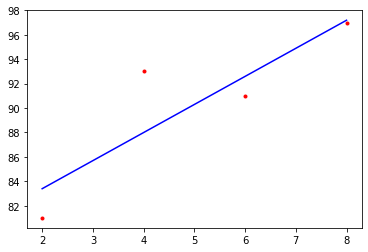

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'blue', X, Y, 'r.')
plt.show()

In [9]:
#Gradient decent로 계산한 W와 b출력
model.layers[0].get_weights()

[array([[2.3000648]], dtype=float32), array([78.79379], dtype=float32)]

In [10]:
w = model.layers[0].get_weights()[0][0]
w

array([2.3000648], dtype=float32)

In [11]:
b = model.layers[0].get_weights()[1][0]
b

78.79379

In [12]:
#x가 2시간일 때와 4시간일 때 성적 예측값 구하기
print(f'x = 2 일 때 {w*2 + b}')
print(f'x = 4 일 때 {w*4 + b}')

x = 2 일 때 [83.39392]
x = 4 일 때 [87.99405]


In [13]:
pred = model.predict([4])
pred

array([[87.99405]], dtype=float32)